## Data Scaling (Standard Scaler)

In [1]:
# import data
import pandas as pd

# import data
df = pd.read_csv('https://raw.githubusercontent.com/josephgitau/Ml_May_Intake/main/births.csv')
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [2]:
# check the data description
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [3]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


<Axes: xlabel='births', ylabel='Count'>

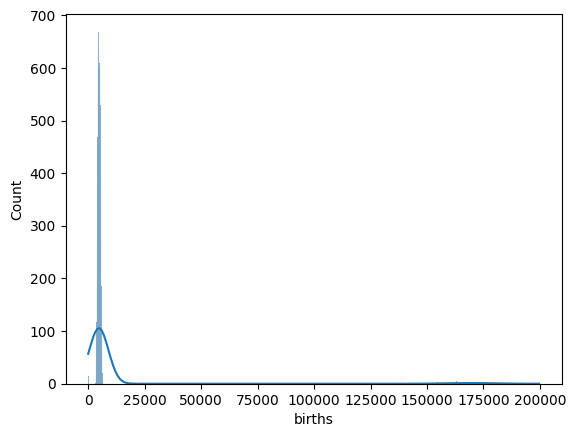

In [4]:
# plot a histogram of the births column
import seaborn as sns

# plot a histogram of the births column
sns.histplot(data=df, x='births', kde=True)

<Axes: xlabel='births'>

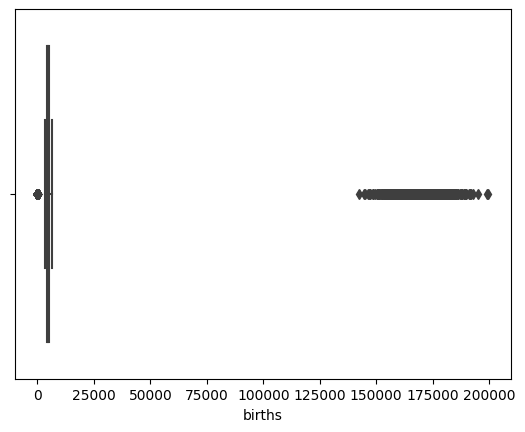

In [5]:
# boxplot of the births column
sns.boxplot(data=df, x='births')

In [6]:
# standardize the birth column
birth_mean = df['births'].mean()
birth_std = df['births'].std()

# standardize the birth column
df['births_standardized'] = (df['births'] - birth_mean) / birth_std

# compare the raw and standardized values
df[['births_standardized', 'births']].describe()

,births_standardized,births
count,1.554700e+04,15547.000000
mean,2.924985e-17,9762.293561
std,1.000000e+00,28552.465810
min,-3.418722e-01,1.000000
25%,-1.892759e-01,4358.000000
50%,-1.733053e-01,4814.000000
75%,-1.566517e-01,5289.500000
max,6.649503e+00,199622.000000


<Axes: xlabel='births_standardized', ylabel='Count'>

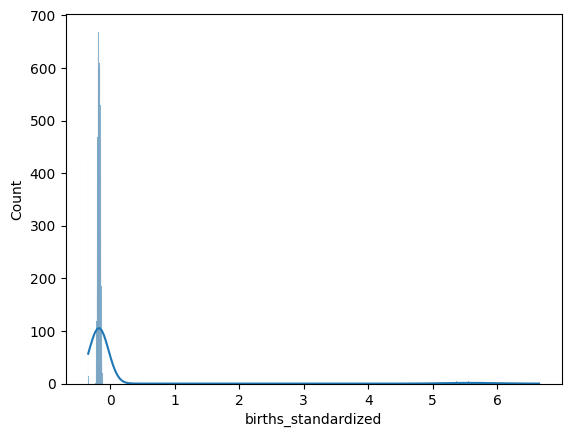

In [7]:
# plot a histogram of the births column
sns.histplot(data=df, x='births_standardized', kde=True)

In [11]:
# using standard scaler
from sklearn.preprocessing import StandardScaler

# instantiate the scaler
scaler = StandardScaler()

# fit_transform
births_scaled = scaler.fit_transform(df[['births']])

# add the scaled column to the dataframe
df['births_scaled_sklearn'] = births_scaled

In [12]:
# compare the three columns
df[['births_standardized', 'births_scaled_sklearn', 'births']].describe()

,births_standardized,births_scaled_sklearn,births
count,1.554700e+04,1.554700e+04,15547.000000
mean,2.924985e-17,1.462492e-17,9762.293561
std,1.000000e+00,1.000032e+00,28552.465810
min,-3.418722e-01,-3.418832e-01,1.000000
25%,-1.892759e-01,-1.892820e-01,4358.000000
50%,-1.733053e-01,-1.733109e-01,4814.000000
75%,-1.566517e-01,-1.566568e-01,5289.500000
max,6.649503e+00,6.649717e+00,199622.000000


## Data Range

In [14]:
# range for the births column
df['births'].max() - df['births'].min()

199621

In [16]:
df['births_scaled_sklearn'].max() - df['births_scaled_sklearn'].min()

6.991600009570741

In [19]:
from numpy import ptp

# checking range column wise
ptp(df[['year', 'month', 'day', 'births']], axis=0)

year          39.0
month         11.0
day            NaN
births    199621.0
dtype: float64

<Axes: xlabel='year'>

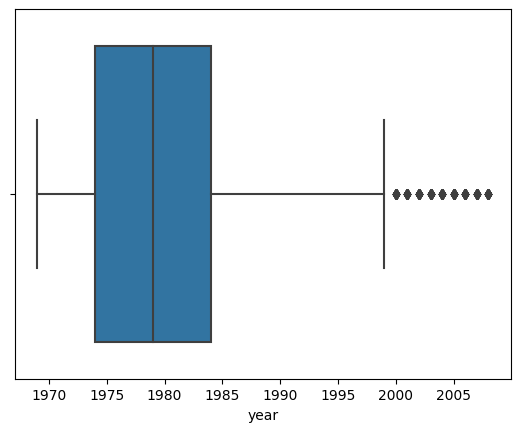

In [21]:
# create a boxplot of the year column
sns.boxplot(data=df, x='year')

In [22]:
# Check the number of missing values
df.isnull().sum()

year                       0
month                      0
day                      480
gender                     0
births                     0
births_standardized        0
births_scaled_sklearn      0
dtype: int64

In [23]:
# Check the percentage of missing values
df.isnull().mean() * 100
# df.dropna(inplace=True)

year                     0.000000
month                    0.000000
day                      3.087412
gender                   0.000000
births                   0.000000
births_standardized      0.000000
births_scaled_sklearn    0.000000
dtype: float64

In [24]:
# import SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# instantiate SimpleImputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# fit the imputers to the data and transform
mean_day = mean_imputer.fit_transform(df[['day']])
median_day = median_imputer.fit_transform(df[['day']])
mode_day = mode_imputer.fit_transform(df[['day']])

# compare the statistics
print('Mean: ', mean_day.mean())
print('Median: ', median_day.mean())
print('Mode: ', mode_day.mean())

Mean:  17.76989447136125
Median:  17.715250530649
Mode:  17.25213867627195


In [29]:
# KNN imputer
from sklearn.impute import KNNImputer

X = df[['day']]

# instantiate the imputer
imputer = KNNImputer(n_neighbors=2)

# fit the imputer to the data
imputer.fit(X)

# transform and round the data
Xtrans = imputer.transform(X)

# convert to dataframe
Xtrans = pd.DataFrame(Xtrans, columns=X.columns)
Xtrans.mean()

day    17.769894
dtype: float64